In [1]:
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn

In [1]:
import sys

In [2]:
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [34]:
import torch
import torchvision
import torchvision.transforms as transforms

In [35]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize(平均, 偏差)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [36]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [37]:
%matplotlib inline

<class 'torch.utils.data.dataloader.DataLoader'>


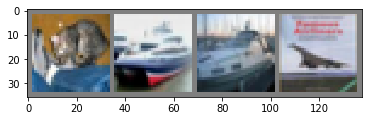

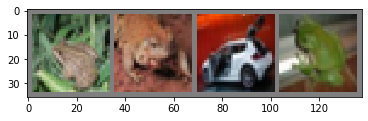

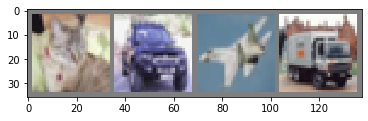

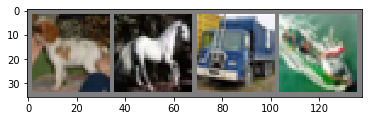

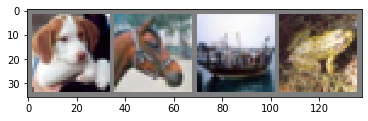

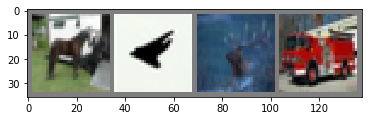

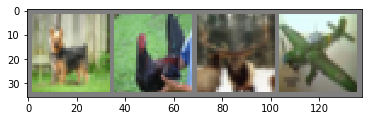

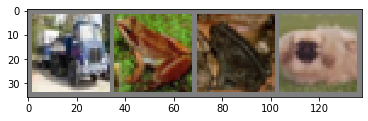

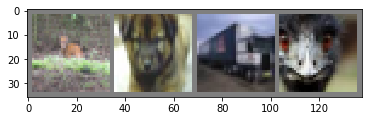

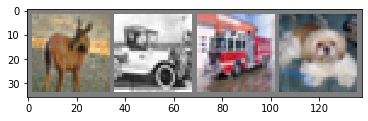

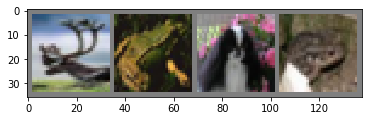

In [41]:
import matplotlib.pyplot as plt
import numpy as np
# Notebook形式の場合画像を表示させるのに必要

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 訓練データをランダムに取得
# images, labels = trainloader

# 画像の表示
print(type(trainloader))
for i, (images, label) in enumerate(testloader):
    imshow(torchvision.utils.make_grid(images))
    if i == 10:
        break